In [80]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings('ignore')

In [3]:
cust_dat = pd.read_csv("customer_segmentation_data - customer_segmentation_data.csv")

# checking about the head of the data 

In [7]:
cust_dat.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [12]:
# checking anout the columns in the datasets 
cust_dat.columns

Index(['id', 'age', 'gender', 'income', 'spending_score', 'membership_years',
       'purchase_frequency', 'preferred_category', 'last_purchase_amount'],
      dtype='object')

# checking about the shape of the dataset

In [14]:
cust_dat.shape

(1000, 9)

In [81]:
cust_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [82]:
cust_dat.describe()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


# checkig the number of the unique category in the dataset 

In [20]:
cust_dat['preferred_category'].nunique()

5

In [83]:
# checking the null values inn the dataset 
print(cust_dat.isnull().sum())

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64


# Data visualisation 

# sementation according to gender 

In [48]:
tab1 = pd.pivot_table(data=cust_dat, index='preferred_category', columns='gender', values='id', aggfunc='count')
tab1

gender,Female,Male,Other
preferred_category,,,
Clothing,56,56,58
Electronics,65,76,74
Groceries,66,71,62
Home & Garden,68,77,61
Sports,61,77,72


<AxesSubplot: xlabel='gender', ylabel='preferred_category'>

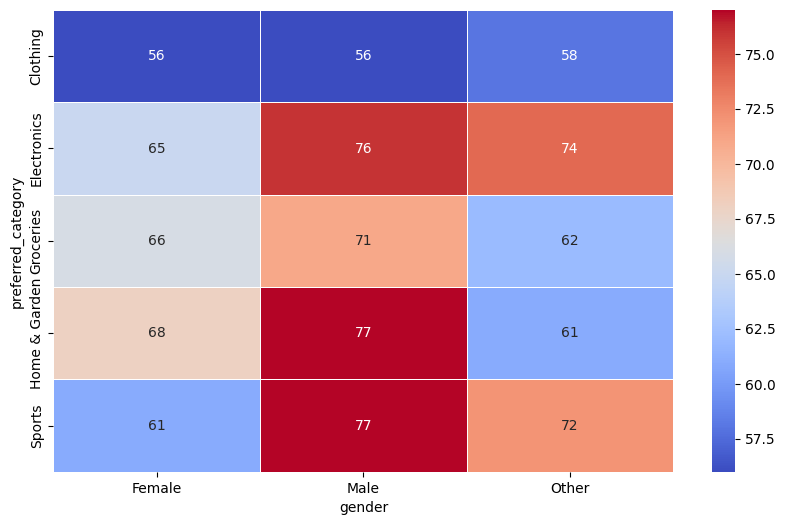

In [53]:
#Create the heatmap using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.heatmap(tab1, annot=True, cmap='coolwarm', fmt='.0f', linewidths=.5)


In [56]:
cust_dat['spending_score'].nunique()

100

In [60]:
# function for finding the crarmers v value 

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))


In [65]:
tab2= pd.crosstab(cust_dat['gender'], cust_dat['purchase_frequency'])

In [67]:
chi2_contingency(tab2)[1]

0.052988291506681176

In [ ]:
#p value is greater then 0.05 hence there is no correlation between the features 

In [68]:
tab3 = pd.crosstab(cust_dat['income'], cust_dat['purchase_frequency'])

In [69]:
chi2_contingency(tab3)[1]

0.4134011456694439

In [70]:
tab4 = pd.crosstab(cust_dat['membership_years'], cust_dat['purchase_frequency'])

In [71]:
chi2_contingency(tab4)[1]

0.8487914988313214

In [72]:
tab5 = pd.crosstab(cust_dat['membership_years'], cust_dat['preferred_category'])

In [74]:
chi2_contingency(tab5)[1]

0.6643602980027528

In [84]:
## Dropping the un necessary columns 
df = cust_dat.drop(['id', 'preferred_category'], axis = 1 )

In [86]:
df.shape

(1000, 7)

In [87]:
## Applying one - hot encoding for the gender columns 

df = pd.get_dummies(df, columns= ['gender'], drop_first= False) 

In [88]:
print(df.isnull().sum())

age                     0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
last_purchase_amount    0
gender_Female           0
gender_Male             0
gender_Other            0
dtype: int64


In [89]:
# Applying the standard scaling to the data 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# converting back to the data frame 

In [93]:
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)

In [94]:
df_scaled

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other
0,-0.384644,0.316868,1.358468,-0.865010,-0.182348,-1.281540,1.471243,-0.745124,-0.697054
1,-1.515362,-0.282016,0.321865,-1.215358,1.082005,-1.523763,1.471243,-0.745124,-0.697054
2,1.078639,1.112778,-0.714738,-1.215358,0.098620,-0.230005,1.471243,-0.745124,-0.697054
3,-0.251618,-1.210096,0.805613,1.237080,-1.516943,1.690080,-0.679697,-0.745124,1.434609
4,1.411203,1.523374,-1.025718,-0.865010,-0.112106,-0.491443,1.471243,-0.745124,-0.697054
...,...,...,...,...,...,...,...,...,...
995,0.879100,0.691806,0.218205,0.186035,-1.797910,-0.604570,-0.679697,1.342058,-0.697054
996,-1.382336,-0.677034,0.874720,1.587428,-0.252590,0.475247,-0.679697,-0.745124,1.434609
997,-1.382336,0.718900,-0.369203,-0.164313,1.082005,-1.411583,-0.679697,1.342058,-0.697054
998,-1.448849,0.736379,0.425525,0.536383,1.222489,0.043341,1.471243,-0.745124,-0.697054


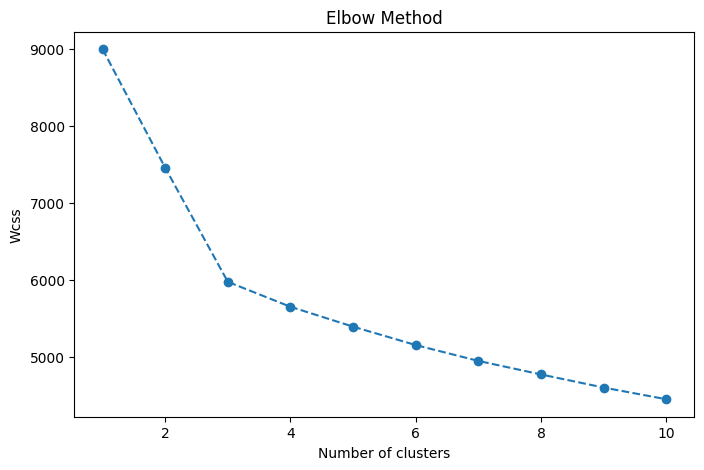

In [100]:
## finding the optimal number of cluster with the help of the elbow method 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++' , max_iter = 100, n_init= 10, random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

#plotting the elbow curve
plt.figure(figsize = (8,5))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

## Assuming that 4 clusters are the good fit 

In [101]:
optimal_clusters = 4 
kmeans = KMeans(n_clusters=optimal_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
df['cluster'] = kmeans.fit_predict(df_scaled)

In [103]:
df.head()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,cluster
0,38,99342,90,3,24,113.53,True,False,False,3
1,21,78852,60,2,42,41.93,True,False,False,3
2,60,126573,30,2,28,424.36,True,False,False,3
3,40,47099,74,9,5,991.93,False,False,True,1
4,65,140621,21,3,25,347.08,True,False,False,3


# Plotting the cluster based on 'income and spending_score'

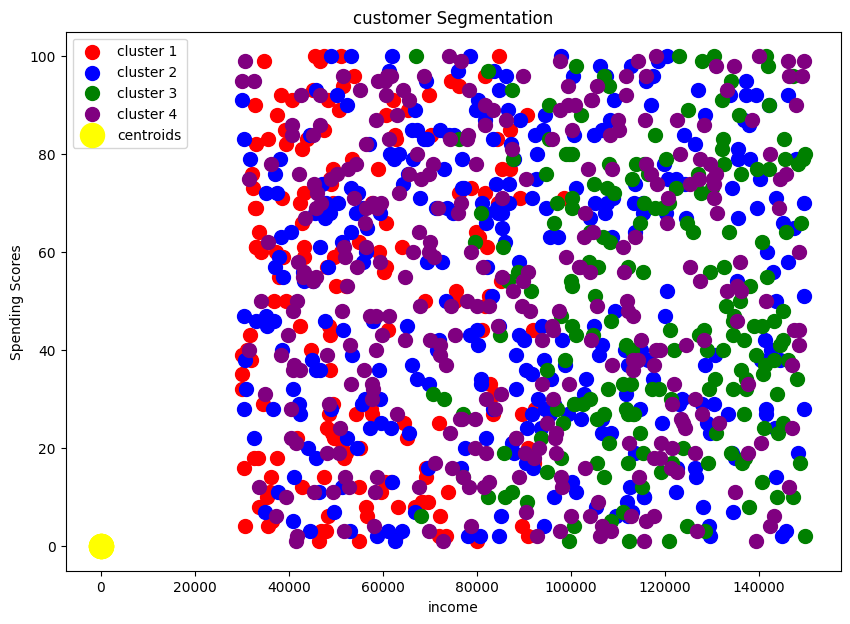

In [112]:
plt.figure(figsize= (10, 7))

plt.scatter(df[df['cluster'] == 0]['income'], df[df['cluster']==0]['spending_score'], s = 100, c = 'red', label = 'cluster 1')

plt.scatter(df[df['cluster'] == 1]['income'], df[df['cluster']==1]['spending_score'], s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(df[df['cluster'] == 2]['income'],  df[df['cluster']==2]['spending_score'], s = 100, c = 'green', label = 'cluster 3')
plt.scatter(df[df['cluster'] == 3]['income'],  df[df['cluster']==3]['spending_score'], s = 100, c = 'purple', label = 'cluster 4')

# plotting the cluster 
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s = 300, c = 'yellow', label = 'centroids')

plt.title('customer Segmentation')

plt.xlabel('income')

plt.ylabel('Spending Scores')

plt.legend()
plt.show()


In [113]:
###Analysing the clusters  
cluster_summary = df.groupby('cluster').mean()
print(cluster_summary)

               age         income  spending_score  membership_years  \
cluster                                                               
0        43.586826   56269.203593       48.646707          6.479042   
1        45.165138   88522.703364       51.788991          5.510703   
2        41.421053  117595.778947       48.894737          4.763158   
3        43.876582   88018.104430       51.696203          5.316456   

         purchase_frequency  last_purchase_amount  gender_Female  gender_Male  \
cluster                                                                         
0                 28.329341            531.355629            0.0          1.0   
1                 25.865443            521.438930            0.0          0.0   
2                 28.278947            465.093579            0.0          1.0   
3                 25.424051            458.018892            1.0          0.0   

         gender_Other  
cluster                
0                 0.0  
1             